In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs

In [3]:
time_series = pd.read_csv('../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_ts.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_ts.csv'

In [ ]:
time_series['date'] = pd.to_datetime(time_series['date'])

# Extract years from the 'date' column
years = time_series['date'].dt.year

In [ ]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

In [ ]:
time_series

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ts = ax.scatter(time_series['date'], time_series["displacement (mm)"], color='b')
plt.xticks(year, labels=year)
plt.xlabel('Date')
plt.ylabel('Displacement (mm)')
plt.title('Displacement Over Time')



In [ ]:
profile = pd.read_csv('../data/sabancaya/deformation-data/sabancaya_047A_10580_131313_x100_profile.csv')

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
ax1.plot(profile['distance (km)'], profile["displacement (mm)"], label='Displacement', color='r')
plt.xlabel('Distance (km)')
plt.ylabel('Displacement (mm)')
ax1.legend()
ax2 = ax1.twinx()
ax2.set_ylabel('Elevation (m)')
ax2.plot(profile['distance (km)'], profile["elevation (m)"], label='Elevation', color='limegreen')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

In [4]:
surface_plot = pd.read_csv('../data/sabancaya_047A_10580_131313_x100_disp_raw.csv')

In [5]:
long = surface_plot['longitude']
lat = surface_plot['latitude']

deformation_data = surface_plot.dropna(subset=['displacement (mm)'])

In [6]:
deformation_data

,latitude,longitude,displacement (mm),coherence,elevation (m)
0,-16.036,-72.106,-57.70,0.54,3361.58
1,-16.036,-72.101,-55.08,0.51,3464.37
2,-16.036,-72.096,-54.80,0.57,3425.61
3,-16.036,-72.091,-52.53,0.60,3483.95
4,-16.036,-72.086,-52.52,0.55,3498.88
...,...,...,...,...,...
9995,-15.538,-71.628,-10.08,0.67,4712.00
9996,-15.538,-71.623,-18.11,0.55,4623.83
9997,-15.538,-71.618,-11.32,0.74,4380.73
9998,-15.538,-71.613,-9.67,0.74,4451.78


In [14]:
caldera_long = [-71.85742, -71.85771, -71.85789, -71.85758, -71.85657, -71.85481, -71.85465, -71.85414, -71.85681, -71.85566, -71.85467]
caldera_lat = [-15.78748, -15.78691, -15.78622, -15.78542, -15.78491, -15.78562, -15.78628, -15.78720, -15.78909, -15.78915, -15.78852]

C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. P

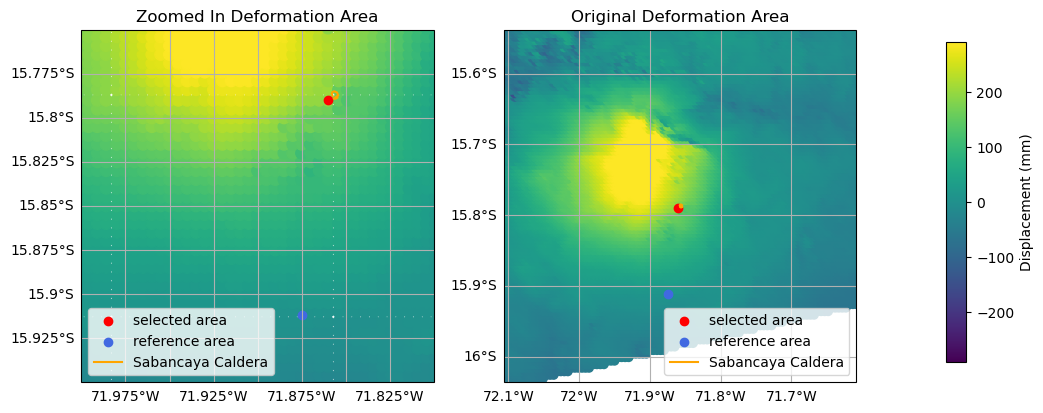

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree()})
# [ax, ax1] = axes.flatten()
#axes[0] = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
vmin = min(deformation_data['displacement (mm)'])
vmax = max(deformation_data['displacement (mm)'])
           
#ax.set_extent([min(long), max(long), min(lat), max(lat)])
axes[0].set_extent([-72, -71.8, -15.95, -15.75])
gridlines = axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines.xlabels_top = False
gridlines.ylabels_right = False

cs = axes[0].scatter(deformation_data['longitude'], deformation_data['latitude'], c=deformation_data['displacement (mm)'], vmin=-290, vmax=290, s=70)
selected = axes[0].scatter(-71.86, -15.79, label="selected area", color='red')
reference = axes[0].scatter(-71.875, -15.912, label='reference area', color='royalblue')
caldera = axes[0].plot(caldera_long, caldera_lat, label='Sabancaya Caldera', color='orange')
axes[0].legend(loc='lower left')
axes[0].set_title('Zoomed In Deformation Area')
# Add a colorbar
#cbar = plt.colorbar(cs, label = 'Displacement (mm)')

#axes[1] = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

           
axes[1].set_extent([min(long), max(long), min(lat), max(lat)])
#ax.set_extent([-72, -71.8, -15.95, -15.75])
gridlines1 = axes[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines1.xlabels_top = False
gridlines1.ylabels_right = False

cs1 = axes[1].scatter(deformation_data['longitude'], deformation_data['latitude'], c=deformation_data['displacement (mm)'], vmin=-290, vmax=290)
axes[1].scatter(-71.86, -15.79, label="selected area", color='red')
axes[1].scatter(-71.875, -15.912, label='reference area', color='royalblue')
axes[1].plot(caldera_long, caldera_lat, label='Sabancaya Caldera', color='orange')
# Add a colorbar
cax = fig.add_axes([0.99, 0.3, 0.02, 0.4])
cbar = plt.colorbar(cs1, cax=cax, label = 'Displacement (mm)')
axes[1].legend()
axes[1].set_title('Original Deformation Area')

plt.savefig('../figures/deformationCBAR.png')



C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\14027\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


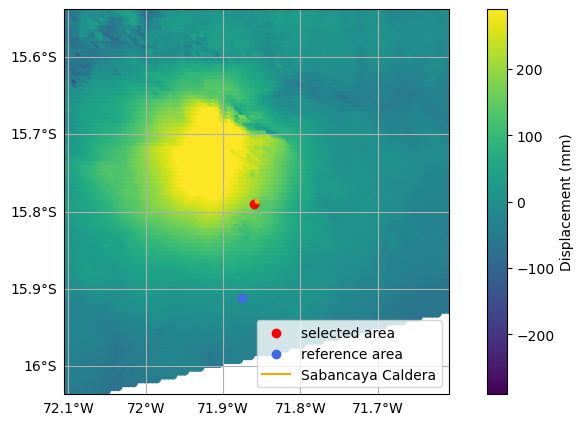

In [21]:

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
vmin = min(deformation_data['displacement (mm)'])
vmax = max(deformation_data['displacement (mm)'])
           
ax.set_extent([min(long), max(long), min(lat), max(lat)])
#ax.set_extent([-72, -71.8, -15.95, -15.75])
gridlines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)



# Plot the deformation data
gridlines.xlabels_top = False
gridlines.ylabels_right = False

cs = ax.scatter(deformation_data['longitude'], deformation_data['latitude'], c=deformation_data['displacement (mm)'], vmin=-290, vmax=290)
selected = ax.scatter(-71.86, -15.79, label="selected area", color='red')
reference = ax.scatter(-71.875, -15.912, label='reference area', color='royalblue')
caldera = ax.plot(caldera_long, caldera_lat, label='Sabancaya Caldera', color='orange')
# Add a colorbar
cbar = plt.colorbar(cs, label = 'Displacement (mm)')


plt.legend()
plt.show()